# Artificial Neuron Layer 
A layer of neurons performs:
1. A linear transformation (matrix multiplication + bias)
2.	A non-linear transformation (activation function)

Mathematically:
$$\mathbf{Z} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}
\quad \Rightarrow \quad
\hat{\mathbf{Y}} = \sigma(\mathbf{Z})$$

In [38]:
import torch 
import matplotlib.pyplot as plt

In [39]:
# Neuron setup 
n_input = 1000 
n_neurons = 100
# simuluting the input x transform 
x= torch.rand(n_input)
x

tensor([2.3217e-01, 2.0648e-01, 1.4801e-01, 6.9799e-01, 1.7806e-03, 3.9302e-01,
        3.3314e-01, 3.2338e-01, 8.9232e-01, 5.4687e-01, 4.9780e-01, 4.1112e-01,
        9.6523e-01, 9.5067e-01, 9.4951e-01, 4.6668e-01, 8.4018e-01, 4.5098e-01,
        1.6442e-01, 6.9505e-01, 2.5716e-01, 4.9560e-01, 5.3395e-01, 8.3753e-01,
        3.2947e-01, 3.7509e-01, 4.7543e-01, 3.9478e-01, 7.1928e-01, 1.8299e-01,
        2.5591e-01, 6.7562e-01, 4.7081e-01, 8.0105e-01, 6.4772e-01, 9.1785e-01,
        1.0514e-01, 4.8338e-01, 2.6882e-01, 7.6519e-01, 9.2601e-01, 2.9476e-01,
        5.0898e-01, 8.1456e-01, 5.5872e-01, 8.5343e-01, 7.1316e-01, 9.8743e-01,
        4.7725e-01, 9.4559e-01, 8.7915e-01, 6.6605e-01, 1.0625e-01, 5.4692e-01,
        6.3737e-01, 7.6422e-01, 1.6771e-01, 7.2160e-01, 5.1417e-01, 1.2138e-01,
        7.0705e-01, 6.3815e-01, 7.5481e-01, 8.8227e-01, 4.4790e-01, 6.2966e-01,
        2.4801e-01, 4.2056e-01, 4.6452e-01, 4.8374e-01, 9.9809e-01, 4.9535e-01,
        2.2903e-01, 3.9597e-01, 5.0488e-

In [40]:
b= torch.zeros(n_neurons)
b.shape
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [41]:
x.shape

torch.Size([1000])

In [42]:
x[0:100]

tensor([0.2322, 0.2065, 0.1480, 0.6980, 0.0018, 0.3930, 0.3331, 0.3234, 0.8923,
        0.5469, 0.4978, 0.4111, 0.9652, 0.9507, 0.9495, 0.4667, 0.8402, 0.4510,
        0.1644, 0.6951, 0.2572, 0.4956, 0.5340, 0.8375, 0.3295, 0.3751, 0.4754,
        0.3948, 0.7193, 0.1830, 0.2559, 0.6756, 0.4708, 0.8010, 0.6477, 0.9179,
        0.1051, 0.4834, 0.2688, 0.7652, 0.9260, 0.2948, 0.5090, 0.8146, 0.5587,
        0.8534, 0.7132, 0.9874, 0.4773, 0.9456, 0.8791, 0.6661, 0.1062, 0.5469,
        0.6374, 0.7642, 0.1677, 0.7216, 0.5142, 0.1214, 0.7070, 0.6381, 0.7548,
        0.8823, 0.4479, 0.6297, 0.2480, 0.4206, 0.4645, 0.4837, 0.9981, 0.4954,
        0.2290, 0.3960, 0.5049, 0.4175, 0.8482, 0.2481, 0.4983, 0.6748, 0.3498,
        0.6959, 0.1648, 0.3008, 0.8430, 0.2004, 0.5187, 0.3196, 0.8747, 0.9420,
        0.0429, 0.9303, 0.2853, 0.6632, 0.3263, 0.0992, 0.2960, 0.4186, 0.1264,
        0.8350])

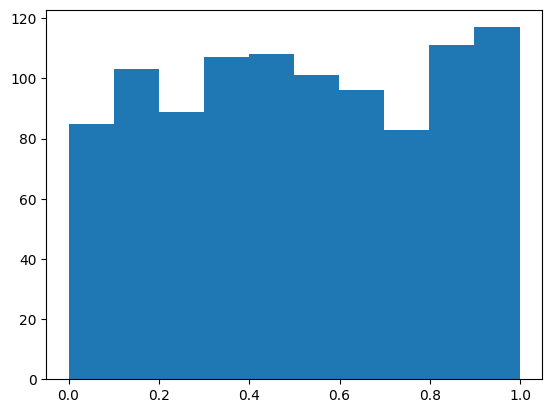

In [43]:
_= plt.hist(x)

In [44]:
# Randomizing weights 
W= torch.empty([n_input, n_neurons])
W =torch.nn.init.xavier_normal_(W)


In [45]:
print(x.shape, W.shape)

torch.Size([1000]) torch.Size([1000, 100])


In [46]:
from numpy import transpose
W_t = transpose(W)
x_w = torch.mul(x, W_t)



In [47]:
x_w

tensor([[ 0.0005,  0.0128, -0.0052,  ..., -0.0369,  0.0635, -0.0331],
        [-0.0137,  0.0038, -0.0038,  ..., -0.0123,  0.0210,  0.0312],
        [-0.0124, -0.0032, -0.0018,  ...,  0.0118,  0.0788,  0.0036],
        ...,
        [ 0.0075, -0.0008,  0.0074,  ...,  0.0112,  0.0164, -0.0068],
        [-0.0105, -0.0016, -0.0012,  ...,  0.0438,  0.0358, -0.0094],
        [-0.0067,  0.0075,  0.0018,  ..., -0.0150,  0.0132,  0.0051]])

In [48]:
print(x.shape)
print(W.shape)
z =torch.matmul(x, W)+b

torch.Size([1000])
torch.Size([1000, 100])


In [49]:
z
z.shape

torch.Size([100])

In [50]:
a = torch.tanh(z)


In [51]:
aa = torch.sigmoid(z)

In [52]:
a

tensor([ 0.5837,  0.2013, -0.1174,  0.3151,  0.2279, -0.8148, -0.1364,  0.2061,
         0.7980, -0.0424,  0.0100, -0.9779, -0.8530, -0.3428, -0.6212, -0.4717,
         0.6920,  0.8479,  0.9589, -0.1622,  0.6843,  0.6648, -0.6326, -0.6699,
        -0.7594,  0.0867, -0.8427,  0.2548, -0.8522, -0.5557,  0.2281,  0.1179,
        -0.8792,  0.8686,  0.6244, -0.8122, -0.5057,  0.8021, -0.4500,  0.5762,
         0.2243,  0.9185, -0.8292, -0.7523,  0.3069,  0.6054,  0.4072,  0.8685,
         0.0751, -0.8918,  0.9501, -0.6144, -0.5147, -0.5961, -0.8179, -0.5398,
        -0.7694,  0.0811, -0.0885, -0.3204, -0.0767,  0.9708, -0.7962, -0.6390,
         0.6768, -0.5122,  0.0088, -0.4475, -0.4020, -0.6542,  0.0699, -0.5597,
        -0.7958, -0.8115,  0.6030,  0.7600,  0.1936, -0.6114, -0.1480, -0.9096,
        -0.3108, -0.6160,  0.1572, -0.1920,  0.4038, -0.5365, -0.7015, -0.6197,
         0.4484,  0.6633,  0.2642, -0.7639,  0.5530,  0.6693, -0.8824,  0.4299,
         0.8987, -0.8272,  0.5511, -0.51

In [53]:
aa

tensor([0.6611, 0.5509, 0.4706, 0.5808, 0.5577, 0.2421, 0.4657, 0.5521, 0.7490,
        0.4894, 0.5025, 0.0956, 0.2198, 0.4116, 0.3259, 0.3747, 0.7009, 0.7771,
        0.8735, 0.4592, 0.6979, 0.6903, 0.3218, 0.3078, 0.2699, 0.5217, 0.2261,
        0.5648, 0.2203, 0.3483, 0.5578, 0.5296, 0.2023, 0.7904, 0.6753, 0.2435,
        0.3642, 0.7511, 0.3811, 0.6585, 0.5568, 0.8291, 0.2341, 0.2733, 0.5786,
        0.6685, 0.6064, 0.7904, 0.5188, 0.1930, 0.8621, 0.3283, 0.3614, 0.3347,
        0.2404, 0.3535, 0.2652, 0.5203, 0.4778, 0.4177, 0.4808, 0.8915, 0.2520,
        0.3194, 0.6949, 0.3622, 0.5022, 0.3819, 0.3951, 0.3138, 0.5175, 0.3470,
        0.2522, 0.2439, 0.6677, 0.7303, 0.5489, 0.3293, 0.4628, 0.1787, 0.4203,
        0.3277, 0.5396, 0.4515, 0.6054, 0.3545, 0.2952, 0.3264, 0.6184, 0.6897,
        0.5673, 0.2679, 0.6508, 0.6920, 0.1999, 0.6130, 0.8124, 0.2352, 0.6502,
        0.3599])

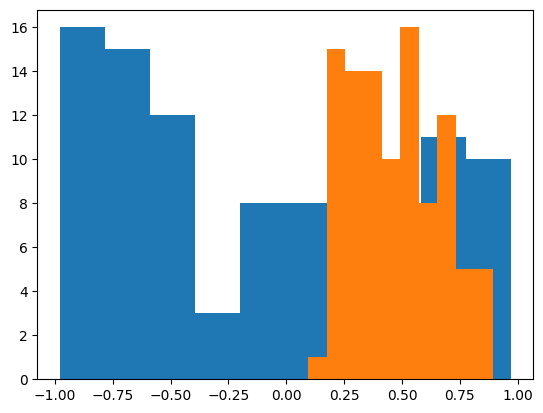

In [54]:
_ = plt.hist(a)
_= plt.hist(aa)

In [58]:
def perceptron(x,W,b):
    """
    A simple perceptron implementation
    """
    z = torch.matmul(x, W) + b
    y = torch.where(z>0, 1, 0)
    return y

In [ ]:
y = perceptron(x,W,b)

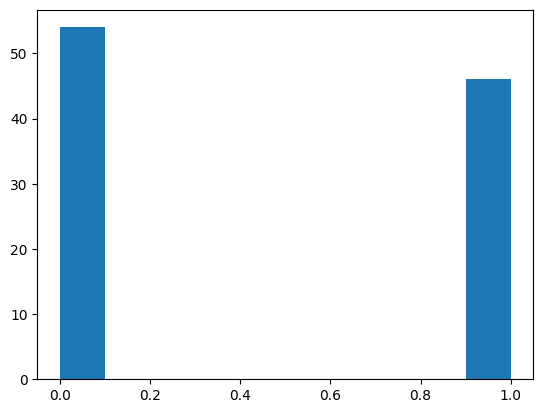

In [61]:
_=plt.hist(y)